In [1]:
# Project for prediction of bike renting based on enviornmental condition
# importing required libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt

In [2]:
#changing the working directory
os.chdir("C:\\Users\\Gaurav's BEAST\Desktop\project3edwisor")

In [3]:
# reading csv file(data)
bike_data = pd.read_csv("day.csv")

In [4]:
#checking the few observations of the data 
bike_data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [5]:
#checking the few observations of the data
bike_data.tail(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
721,722,2012-12-22,1,1,12,0,6,0,1,0.265833,0.236113,0.441250,0.407346,205,1544,1749
722,723,2012-12-23,1,1,12,0,0,0,1,0.245833,0.259471,0.515417,0.133083,408,1379,1787
723,724,2012-12-24,1,1,12,0,1,1,2,0.231304,0.258900,0.791304,0.077230,174,746,920
724,725,2012-12-25,1,1,12,1,2,0,2,0.291304,0.294465,0.734783,0.168726,440,573,1013
725,726,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [6]:
# looking at information of the dataset
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
# looking at five point summary for our numerical variables
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
#categorising the variables
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
cat_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [9]:
# unique values of categories variables
bike_data[cat_columns].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [10]:
# counting of each unique values in each categorical variable
print("value counts of categorical column")
print()
for i in cat_columns:
    print(i)
    print(bike_data[i].value_counts())
    print('=========================')

value counts of categorical column

season
3    188
2    184
1    181
4    178
Name: season, dtype: int64
yr
1    366
0    365
Name: yr, dtype: int64
mnth
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     57
Name: mnth, dtype: int64
holiday
0    710
1     21
Name: holiday, dtype: int64
weekday
6    105
1    105
0    105
5    104
4    104
3    104
2    104
Name: weekday, dtype: int64
workingday
1    500
0    231
Name: workingday, dtype: int64
weathersit
1    463
2    247
3     21
Name: weathersit, dtype: int64


In [11]:
# checking for missing values in dataset
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

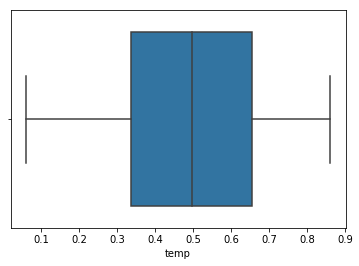

In [12]:
sns.boxplot(bike_data['temp'])

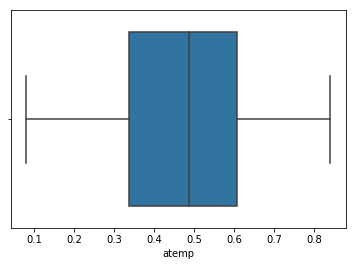

In [13]:
sns.boxplot(bike_data['atemp'])

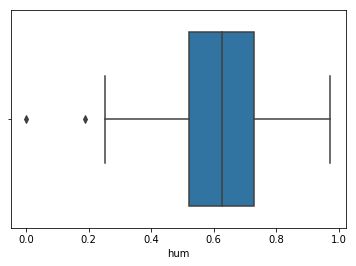

In [14]:
sns.boxplot(bike_data['hum'])

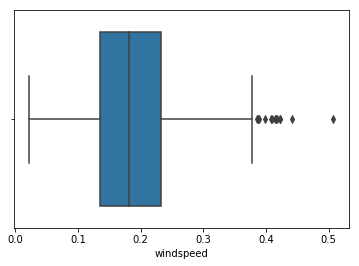

In [15]:
sns.boxplot(bike_data['windspeed'])

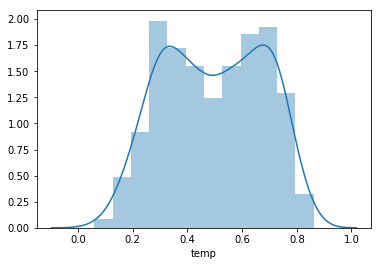

In [16]:
sns.distplot(bike_data['temp'])

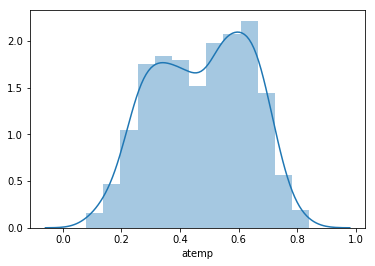

In [17]:
sns.distplot(bike_data['atemp'])

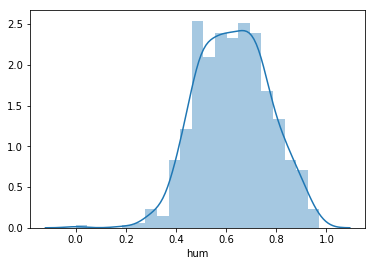

In [18]:
sns.distplot(bike_data['hum'])

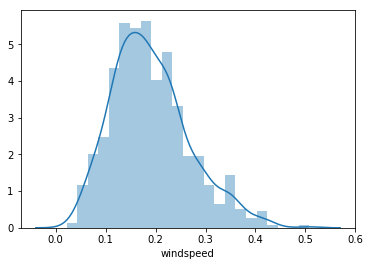

In [19]:
sns.distplot(bike_data['windspeed'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


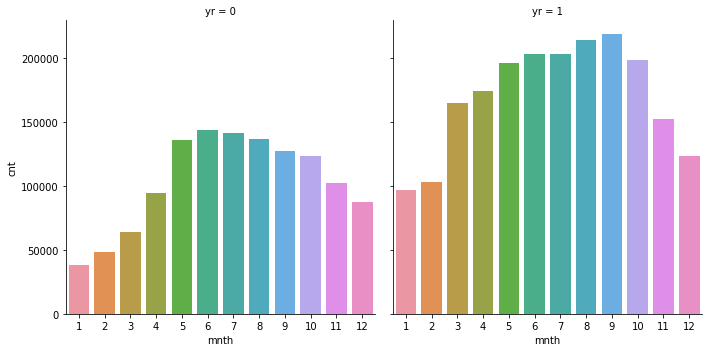

In [20]:
gp = bike_data.groupby(by = ['yr', 'mnth']).sum().reset_index()
sns.factorplot(x= 'mnth', y = 'cnt', data = gp, col = 'yr', kind = 'bar')


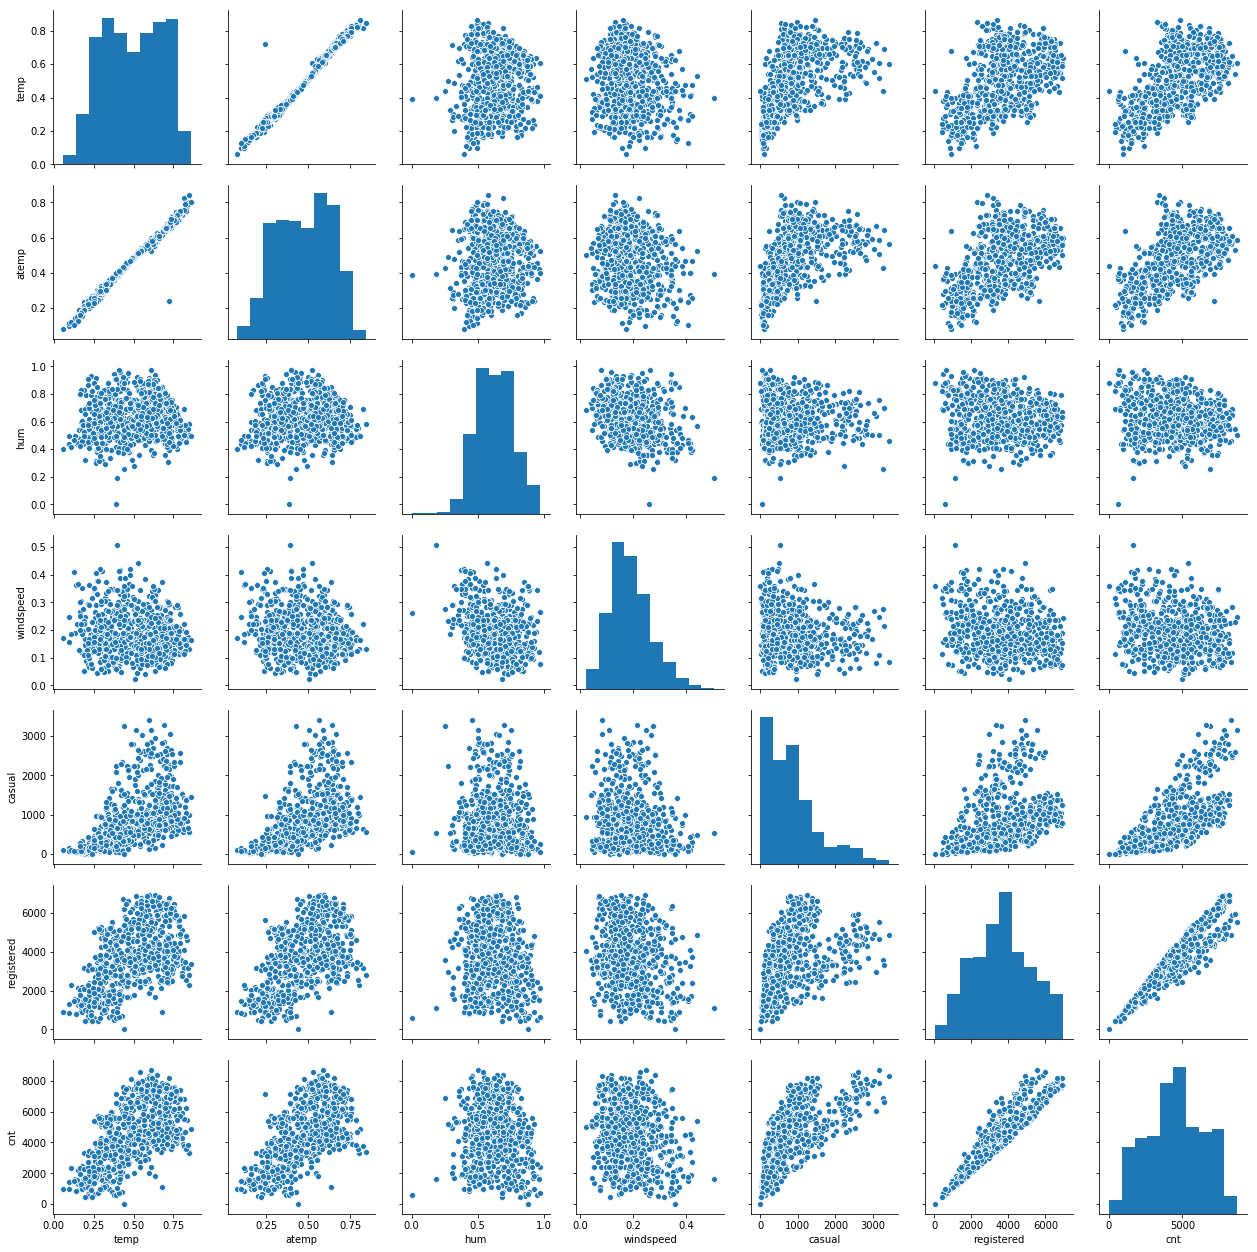

In [21]:
sns.pairplot(bike_data[numeric_columns])

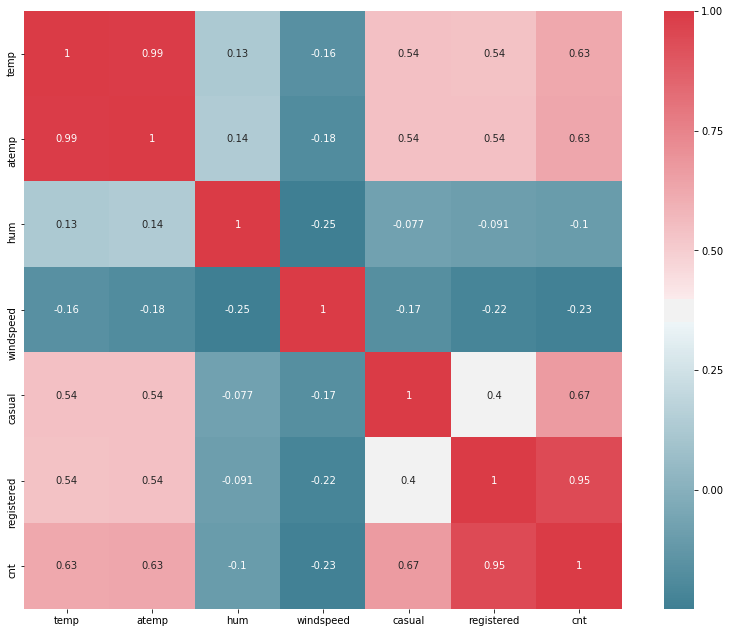

In [22]:
fig = plt.figure(figsize = (15,11))
corr = bike_data[numeric_columns].corr()
sn_plt = sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), square = True,
            annot= True, cmap = sns.diverging_palette(220, 10, as_cmap= True))

In [23]:
# dropping unwanted columns from both dataset bike_data 
bike_data.drop(columns=['instant', 'dteday', 'holiday', 'atemp', 'casual', 'registered'], inplace=True)

In [24]:
bike_data.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,6,0,2,0.344167,0.805833,0.160446,985
1,1,0,1,0,0,2,0.363478,0.696087,0.248539,801
2,1,0,1,1,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,2,1,1,0.200000,0.590435,0.160296,1562
4,1,0,1,3,1,1,0.226957,0.436957,0.186900,1600


In [25]:
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import cross_val_score
def fit_predict_show_performance(regressor, X_train, y_train, X_test, y_test):
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    ten_performances = cross_val_score(estimator=regressor, X = X_train, y = y_train, cv = 10, 
                                       scoring='explained_variance')
    k_fold_performance = ten_performances.mean()
    print("K-fold (K = 10) explained variance")
    print("================================")
    print(k_fold_performance)
    print()
    print("on train data explained variance")
    print("================================")
    print(regressor.score(X_train, y_train)) 
    print()
    print("on test data explained variance")
    print("================================")
    print(regressor.score(X_test, y_test))

In [26]:
X = bike_data.drop(columns=['cnt'])
y = bike_data['cnt']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
fit_predict_show_performance(regressor, X_train, y_train, X_test, y_test)

K-fold (K = 10) explained variance
0.7911356908664054

on train data explained variance
0.7950315616465846

on test data explained variance
0.7979478105046451


In [28]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=5)
fit_predict_show_performance(regressor, X_train, y_train, X_test, y_test)

K-fold (K = 10) explained variance
0.7521409290188046

on train data explained variance
0.8415250556221727

on test data explained variance
0.7764622580352605


In [29]:
from sklearn.svm import SVR
regressor = SVR()
fit_predict_show_performance(regressor, X_train, y_train, X_test, y_test)

K-fold (K = 10) explained variance
0.018936390909886358

on train data explained variance
0.020596938640411233

on test data explained variance
0.020310572163463436


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

In [30]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=1)
fit_predict_show_performance(regressor, X_train, y_train, X_test, y_test)

K-fold (K = 10) explained variance
0.762613238542136

on train data explained variance
1.0

on test data explained variance
0.8212880865388831


In [31]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state=1)
fit_predict_show_performance(regressor, X_train, y_train, X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


K-fold (K = 10) explained variance
0.8559757167106608

on train data explained variance
0.9759933451142289

on test data explained variance
0.8940480431640379


In [32]:
from xgboost import XGBRegressor
regressor = XGBRegressor(random_state=1)
fit_predict_show_performance(regressor, X_train, y_train, X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaco

K-fold (K = 10) explained variance
0.8892701595016217

on train data explained variance
0.9512586965545669

on test data explained variance
0.8882196179290706


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
